Objective: detect hate speech in tweets.
- Racist or Sexist label 1 for hate sentiment
- Topic not related to Racist or Sexist label 0

# Import Python Libraries and Datasets

In [1]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [8]:
train=pd.read_csv('/content/traindata.csv')
test=pd.read_csv('/content/testdata.csv')

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Text Pre-processing

In [11]:
#check out non-racist and non-sexist text records
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
#check out racist or sexist content records
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [13]:
train.shape , test.shape

((31962, 3), (17197, 2))

In [16]:
#get the label distribution
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

- in this case, we can get 2242 of 31962 records include sexual or racial content, leading to hate sentiment.

In [19]:
#check out the length distribution of tweets, in term of words, including test and train datasets
len_train=train['tweet'].str.len()
len_test=test['tweet'].str.len()

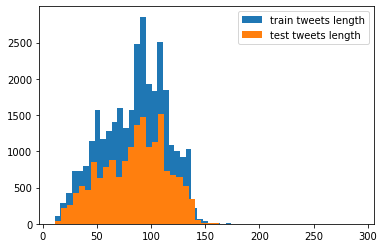

In [21]:
#visualize the length distributions
plt.hist(len_train, bins=50,label="train tweets length")
plt.hist(len_test,bins=50,label='test tweets length')
plt.legend()
plt.show()

In [23]:
#append train and test datasets for data cleaning
data=train.append(test)
data.shape

(49159, 3)

In [24]:
#establish a user-defined function to remove unwanted texts of tweets
def remove_pattern(input_txt, pattern):
  r=re.findall(pattern,input_txt)
  for i in r:
    input_txt=re.sub(i,'',input_txt)
  return input_txt

In [26]:
#remove twitter handles@user
#set up a new column
data['tidy_tweet']=np.vectorize(remove_pattern)(data['tweet'],"@[/w]*")
data.head()
#np.vectorize(python_function) with input and pattern

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can't use ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [28]:
#remove punctuations,numbers,and special characters
data['tidy_tweet']=data['tidy_tweet'].replace(['[^a-zA-Z#]',' '])
data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can't use ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [31]:
#remove short words which are less than or equal to 3
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,user when father dysfunctional selfish drags k...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thanks #lyft credit can't cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [33]:
#text normalization
#tokenization
tokenized_tweet=data['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [user, when, father, dysfunctional, selfish, d...
1    [user, user, thanks, #lyft, credit, can't, cau...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [35]:
#use nltk to normalize tokenized tweets
from nltk.stem.porter import *
stemmer=PorterStemmer()
#stemming
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [user, when, father, dysfunct, selfish, drag, ...
1    [user, user, thank, #lyft, credit, can't, cau,...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: tidy_tweet, dtype: object